In [79]:
#importing the necessary package
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# loading the dataset
df= pd.read_excel('SLU Opportunity Wise Data.xlsx')
df.head()

,Learner SignUp DateTime,Opportunity Id,Opportunity Name,Opportunity Category,Opportunity End Date,First Name,Date of Birth,Gender,Country,Institution Name,Current/Intended Major,Entry created at,Status Description,Status Code,Apply Date,Opportunity Start Date
0,06/14/2023 12:30:35,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,06/29/2024 18:52:39,Faria,2001-12-01 00:00:00,Female,Pakistan,Nwihs,Radiology,2024-11-03 12:01:41,Started,1080.0,06/14/2023 12:36:09,2022-03-11 18:30:39
1,2023-01-05 05:29:16,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,06/29/2024 18:52:39,Poojitha,08/16/2000,Female,India,SAINT LOUIS,Information Systems,2024-11-03 12:01:41,Started,1080.0,2023-01-05 06:08:21,2022-03-11 18:30:39
2,2023-09-04 20:35:08,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,06/29/2024 18:52:39,Emmanuel,01/27/2002,Male,United States,Illinois Institute of Technology,Computer Science,2024-11-03 12:01:41,Started,1080.0,2023-11-05 00:21:29,2022-03-11 18:30:39
3,08/29/2023 05:20:03,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,06/29/2024 18:52:39,Amrutha Varshini,1999-01-11 00:00:00,Female,United States,Saint Louis University,Information Systems,2024-11-03 12:01:41,Team Allocated,1070.0,2023-09-10 22:02:42,2022-03-11 18:30:39
4,2023-06-01 15:26:36,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,06/29/2024 18:52:39,Vinay Varshith,04/19/2000,Male,United States,Saint Louis University,Computer Science,2024-11-03 12:01:41,Started,1080.0,2023-06-01 15:40:10,2022-03-11 18:30:39


In [80]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8558 entries, 0 to 8557
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Learner SignUp DateTime  8558 non-null   object        
 1   Opportunity Id           8558 non-null   object        
 2   Opportunity Name         8558 non-null   object        
 3   Opportunity Category     8558 non-null   object        
 4   Opportunity End Date     8558 non-null   object        
 5   First Name               8558 non-null   object        
 6   Date of Birth            8558 non-null   object        
 7   Gender                   8558 non-null   object        
 8   Country                  8558 non-null   object        
 9   Institution Name         8554 non-null   object        
 10  Current/Intended Major   8558 non-null   object        
 11  Entry created at         8558 non-null   datetime64[ns]
 12  Status Description       8558 non-

# Data Cleaning

In [81]:
# convert date columns
date_cols = [
    'Learner SignUp DateTime',
    'Date of Birth',
    'Apply Date',
    'Opportunity Start Date',
    'Opportunity End Date',
    'Entry created at'
]
df[date_cols] = df[date_cols].apply(pd.to_datetime, errors='coerce')


In [82]:
#convert gender and country
df['Gender'] = df['Gender'].astype('category')
df['Country'] = df['Country'].astype('category')


In [83]:
#check missing values 
df[df["Institution Name"].isna()]

,Learner SignUp DateTime,Opportunity Id,Opportunity Name,Opportunity Category,Opportunity End Date,First Name,Date of Birth,Gender,Country,Institution Name,Current/Intended Major,Entry created at,Status Description,Status Code,Apply Date,Opportunity Start Date
239,2024-09-01 03:21:24,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Kavitha,2001-10-25,Female,India,NaN,Cloud Computing,2024-11-03 12:01:43,Team Allocated,1070.0,2024-11-01 12:15:48,2022-03-11 18:30:39
3347,2024-09-01 03:21:24,00000000-0GHB-4N83-QX9K-JM48K2,Project Management,Internship,2024-11-03 18:00:00,Kavitha,2001-10-25,Female,India,NaN,Cloud Computing,2024-11-03 12:02:17,Rejected,1030.0,2024-11-01 12:12:41,NaT
4994,2024-04-01 07:08:24,00000000-0GWQ-AXC5-X45C-2MHJ28,Data Visualization,Internship,2024-11-03 18:00:00,Shreevikas,2000-04-08,Male,India,NaN,Computer Science,2024-11-03 12:02:36,Dropped Out,1050.0,2024-04-01 16:45:40,NaT
6021,2024-09-01 03:21:24,00000000-10GG-17ZM-AP4T-WQVBGQ,Data Visualization Associate,Internship,2024-11-03 18:00:00,Kavitha,2001-10-25,Female,India,NaN,Cloud Computing,2024-11-03 12:02:48,Team Allocated,1070.0,2024-09-01 03:45:11,NaT


In [85]:
# fill missing values
df['Institution Name'].fillna('Unknown', inplace=True)


In [84]:
# median information by opportunity id
group_medians = df.groupby('Opportunity Id')['Opportunity Start Date'].transform(lambda x: x.median())

C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [86]:
# fill the opportunity start date by median per opportunity id
df['Opportunity Start Date'] = df['Opportunity Start Date'].fillna(group_medians)

In [87]:
# fill the remaining missing values by the general median
global_median = df['Opportunity Start Date'].median()
df['Opportunity Start Date'] = df['Opportunity Start Date'].fillna(global_median)

In [88]:
# Calculate the median for signup dates
signup_median = df['Learner SignUp DateTime'].median()

# Fill missing values
df['Learner SignUp DateTime'].fillna(signup_median, inplace=True)

In [89]:
# Calculate the median for apply date
apply_median = df['Apply Date'].median()

# Fill missing values
df['Apply Date'].fillna(apply_median, inplace=True)

In [92]:
# clean the country column
df['Country'] = df['Country'].replace({
    'Iran  Islamic Republic of Persian Gulf': 'Iran',
    'Iran, Islamic Republic of Persian Gulf': 'Iran',
    'Korea, Republic of South Korea': 'South Korea',
    'Tanzania, United Republic of Tanzania': 'Tanzania',
    'Libyan Arab Jamahiriya': 'Libya',
    "Cote d'Ivoire": 'Ivory Coast',
    'Virgin Islands, U.S.': 'U.S. Virgin Islands'
})


In [93]:
#check for the clean country column
df.head()

,Learner SignUp DateTime,Opportunity Id,Opportunity Name,Opportunity Category,Opportunity End Date,First Name,Date of Birth,Gender,Country,Institution Name,Current/Intended Major,Entry created at,Status Description,Status Code,Apply Date,Opportunity Start Date
0,2023-06-14 12:30:35,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Faria,2001-12-01,Female,Pakistan,Nwihs,Radiology,2024-11-03 12:01:41,Started,1080.0,2023-06-14 12:36:09,2022-03-11 18:30:39
1,2023-01-05 05:29:16,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Poojitha,2000-08-16,Female,India,SAINT LOUIS,Information Systems,2024-11-03 12:01:41,Started,1080.0,2023-01-05 06:08:21,2022-03-11 18:30:39
2,2023-09-04 20:35:08,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Emmanuel,2002-01-27,Male,United States,Illinois Institute of Technology,Computer Science,2024-11-03 12:01:41,Started,1080.0,2023-11-05 00:21:29,2022-03-11 18:30:39
3,2023-08-29 05:20:03,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Amrutha Varshini,1999-01-11,Female,United States,Saint Louis University,Information Systems,2024-11-03 12:01:41,Team Allocated,1070.0,2023-09-10 22:02:42,2022-03-11 18:30:39
4,2023-06-01 15:26:36,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Vinay Varshith,2000-04-19,Male,United States,Saint Louis University,Computer Science,2024-11-03 12:01:41,Started,1080.0,2023-06-01 15:40:10,2022-03-11 18:30:39


In [95]:
# checking for duplicates
df.duplicated().sum()

0

In [96]:
# to ensure smooth data cleaning of the institution name, save it into a file
unique_institutions = df['Institution Name'].dropna().unique()
from docx import Document

doc = Document()
doc.add_heading('All Unique Institution Names', level=1)

for name in sorted(unique_institutions):
    doc.add_paragraph(name)

doc.save("all_institutions.docx")


In [97]:
# convert institution name to proper case
df['Institution Name'] = df['Institution Name'].str.title()

In [98]:
#further clean the institution name
df['Institution Name'] = (
    df['Institution Name']
    .str.strip()                               # Remove leading/trailing whitespace
    .str.replace(r'\s+', ' ', regex=True)      # Replace multiple spaces with one
    .str.replace('&', 'and')                   # Replace & with and
)

In [99]:
#replacing institution name
# Step 1: Define corrections dictionary
corrections = {
    #Abdul wali Khan university
    "Abdul wali Khan university": "Abdul Wali Khan University",
    "Abdul wali khan University Mardan": "Abdul Wali Khan University",
    "Abdul wali khan university Mardan": "Abdul Wali Khan University",
    
    # Adekunle Ajasin University
    "Adekunle Ajasin University  Akungba Akoko": "Adekunle Ajasin University",
    "Adekunle Ajasin University  Akungba Ondo  Nigeria": "Adekunle Ajasin University",
   
    # African School of Management and Technology
    "African School of Management and Technologie": "African School of Management and Technology",
    "African School of management of technology": "African School of Management and Technology",
    "Afsm": "African School of Management and Technology",
    
    #Allama Iqbal Open University
    "Allama Iqbal university": "Allama Iqbal Open University",
    "allama iqbal open universty": "Allama Iqbal Open University",
   
    #Al-Nahrain University
    "al-nahrain": "Al-Nahrain University",
    
    # Ambalika Institute of Management and Technology
    "Ambalika institue of management and technology": "Ambalika Institute of Management and Technology",
    
    #Babcock University
    "BABCOCK": "Babcock University",
   
    #Bingham University
    "Bingham University Karu": "Bingham University",
    "Bingham University Karu Nassarawa state Nigeria" : "Bingham University",
    
    # Saint Louis University variants
    "SAINT LOUIS": "Saint Louis University",
    "saintlouis": "Saint Louis University",
    "Saint.louis university": "Saint Louis University",
    "Saint Louis university": "Saint Louis University",
    "saint louis": "Saint Louis University",
    "saint louis University": "Saint Louis University",
    "saint louis univerisity": "Saint Louis University",
    "saint louis univeristy": "Saint Louis University",
    "saint louis univercity": "Saint Louis University",
    "Saint Louis Unniversity": "Saint Louis University",
    "Saint louis University": "Saint Louis University",
    "St louis university": "Saint Louis University",
    "St. louis university": "Saint Louis University",
    "St. Louis University": "Saint Louis University",

    # Abia State University variants
    "Abia State UNIVERSITY  UTURU": "Abia State University",
    "Abia State University": "Abia State University",
    "Abia state university  uturu.": "Abia State University",

    # Federal University of Technology Owerri variants
    "Federal University of Technology  Owerri": "Federal University of Technology Owerri",
    "Federal University of Technology  Owerri  Nigeria": "Federal University of Technology Owerri",
    "Federal University of technology Owerri": "Federal University of Technology Owerri",
    "Federal University of Tecnology Owerri  Imo Nigeria": "Federal University of Technology Owerri",

    # Federal University Oye Ekiti
    "Federal University Oye-Ekiti Ekiti": "Federal University Oye Ekiti",
    "Federal university oye ekiti.": "Federal University Oye Ekiti",

    # Federal University Wukari
    "Federal University Wukari Taraba state Nigeria": "Federal University Wukari",
    "Federal university wukari": "Federal University Wukari",

    # Ahmadu Bello University
    "Ahmadu Bello university Zaria": "Ahmadu Bello University",
    "Ahmadu Bello university zaria": "Ahmadu Bello University",
    "Ahmadu Bello university Zaria kaduna state Nigeria": "Ahmadu Bello University",
    "Ahmadu Bello University Zaria Kaduna State": "Ahmadu Bello University",
    "Ahmadu Bello University Zaria  Nigeria.": "Ahmadu Bello University",
    "Ahmadu Bello University  zaria": "Ahmadu Bello University",
    "Ahmadu Bello university zaria": "Ahmadu Bello University",
    
    #Birla institute of technology 
    "Birla institute of technology  Mesra" : "Birla institute of technology",
    
    #Cairo university
    "Cairo university" : "Cairo University",
    
    #CMR Engineering college
    "CMR ENGINEERING COLLEGE" : "CMR Engineering college",
    
    #CMR Institute of technology
    "CMR INSTITUTE OF TECHNOLOGY": "CMR Institute of technology",
    "CMRit" : "CMR Institute of technology",
    
    #COMSATS university Islamabad campus
    "COMSATS university Islamabad campus": "Comsats University Islamabad",
    "Comstas university Islamabad attock campus": "COMSATS university Islamabad Attock campus",
    
    # Covenant University
    "Covenant university": "Covenant University",

    # Lagos State University
    "Lagos state university": "Lagos State University",
    "Lagos State University (LASU)": "Lagos State University",

    # Yaba College of Technology
    "Yaba college of technology": "Yaba College Of Technology",
    "Yabatech": "Yaba College Of Technology",

    # Nnamdi Azikiwe University
    "Nnamdi Azikiwe University awka": "Nnamdi Azikiwe University",
    "Nnamdi Azikiwe university": "Nnamdi Azikiwe University",
    "Nnamdi Azikwe University": "Nnamdi Azikiwe University",
    "Nnamdi azikiwe University": "Nnamdi Azikiwe University",

    # Michael Okpara University of Agriculture
    "Micheal Okpara University of Agriculture  Umudike": "Michael Okpara University of Agriculture",
    "Michael Okpara University Of Agriculture": "Michael Okpara University of Agriculture",
    "Michael Okpara University of Agriculture  Umudike": "Michael Okpara University of Agriculture",
    "Michael Okpara University of Agriculture Umudike Abia State": "Michael Okpara University of Agriculture",
    
    #Deenbandhu Chhotu Ram University Of Science And Technology  Murthal
    "Deenbandhu Chhotu Ram University of Science and Technology  Murthal" :"Deenbandhu Chhotu Ram University Of Science And Technology  Murthal",

    #Delta State University  Abraka
    "Delta State University  Abraka": "Delta State University Abraka",
    "Delta state University  Abraka": "Delta State University Abraka",

    #Dhanalakshmi Srinivasan Engineering College
    "Dhanalakshmi Srinivasan Engineering College Perambalur":"Dhanalakshmi Srinivasan Engineering College",
    "Dhanalakshmi Srinivasan Engineering Collge" : "Dhanalakshmi Srinivasan Engineering College",
    
    #Dhanekula Institute of Engineering and Technology 
    "Dhanekula Institute of Engineering and technology":"Dhanekula Institute of Engineering and Technology",
    
    #Dr DY Patil College of Engineering and Innovation
    "Dr D Y patil college of engineering and innovation pune" :"Dr DY Patil College of Engineering and Innovation",
    "Dr D.Y. Patil College of Engineering and Innovation" : "Dr DY Patil College of Engineering and Innovation",
    "Dr.D.Y.Patil school of science and technology pune" : "Dr DY Patil College of Engineering and Innovation",
    
    #Dwarkadas J. Sanghvi college of Engineering
    "Dwarkadas J Sanghvi College of Engineering" :"Dwarkadas J. Sanghvi college of Engineering",
    
    #Egerton University
    "Egerton University niversity":"Egerton University",
    
    #Ekiti State University
    "Ekiti State University Ado Ekiti":"Ekiti State University",
    "Ekiti state university":"Ekiti State University",
    
    #Enugu State University of Science and Technology
    "Enugu State University":"Enugu State University of Science and Technology",
    "Enugu State University of Science and technology":"Enugu State University of Science and Technology",
    
    #FAST -NUCES
    "FAST NUCES":"FAST -NUCES",
    
    #Federal University of Agriculture  Makurdi
    "Federal University of Agriculture Makurdi":"Federal University of Agriculture  Makurdi",
    "Federal University of Agriculture Makurdi Benue State":"Federal University of Agriculture  Makurdi",
    
    #Federal University Of Lafia
    "Federal University of Lafia":"Federal University Of Lafia",
    
    #Gayatri Vidya Parishad College of engineeirng
    "Gayatri Vidya Parishad College of Engineering (Autonomous)":"Gayatri Vidya Parishad College of engineeirng",
    
    #Geethanjali College of Engineering and Technology
    "Geethanjali collage of engineering and technology":"Geethanjali College of Engineering and Technology",
    "Geethanjali college of engineering and technology":"Geethanjali College of Engineering and Technology",
    
    #Gitam University
    "Giatm":"Gitam University",
    "Gitam":"Gitam University",
    "Gitam university":"Gitam University",
    
    #Global wealth university
    "Global wealth University Togo":"Global wealth university",
    
    #Hindustan Institute of Technology and Science
    "Hindustan Institution of Technology and Science":"Hindustan Institute of Technology and Science",
    "Hindustan institute of technology and science":"Hindustan Institute of Technology and Science",
    
    #IIT ISM Dhanbad
    "IIT(ISM) Dhanbad":"IIT ISM Dhanbad",
    
    #Illinois Institute Of Technology
    "Illinois Institute of Technolog":"Illinois Institute Of Technology",
    "Illinois Institute of Technology  Chicago":"Illinois Institute Of Technology",
    
    #JNTUK-University College of Engineering Vizianagaram
    "JNTUK":"JNTUK-University College of Engineering Vizianagaram",
    
    #Jamia hamdard
    "Jamia hamdard  New Delhi":"Jamia hamdard",
    "Jamia hamdard university":"Jamia hamdard",
}

# Step 2: Apply correction to DataFrame
df['Institution Name'] = df['Institution Name'].replace(corrections)

# Done! Optional: check what’s still messy
# df['Institution Name'].value_counts().head(20)


In [100]:
#checking for current/intended major
df["Current/Intended Major"].unique()

array(['Radiology', 'Information Systems', 'Computer Science',
       'Mechanical Engineering', 'Computer Science and Engineering',
       'Artificial Intelligence', 'Robotics and Automation Engineering',
       'Data Visualization', 'Business Administration', 'Public Health',
       'Architecture', 'Computer Science and Information Systems',
       'Biology', 'Economics', 'Oth', 'Mathematics', 'Bioinformatics',
       'I Am Major', 'Biomedical Engineering',
       'Electrical and Electronic Engineering',
       'Business and Management Studies',
       'Electrical and Computer Engineering', 'Accounting and Finance',
       'Secretarial', 'Data Science', 'Statistics',
       'Electronics and Communication', 'Computer Information Systems',
       'Management Information Systems', 'Other', 'Project Management',
       'Medicine', 'Information', 'Information Technology',
       'Actuarial Mathematics', 'Software Engineering',
       'Biological Sciences', 'Urban and Housing Development',


In [101]:
# correcting for current major
corrections = {
    'Could Computing': 'Cloud Computing',
    'Data Sceince': 'Data Science',
    'Computer science engineering': 'Computer Science Engineering',
    'Information technology': 'Information Technology',
    'Cybersecurity': 'Cyber Security',
    'Business ': 'Business'
}

# Clean the 'Field of Study' column
df['Current/Intended Major'] = (
    df['Current/Intended Major']
    .str.strip()
    .str.replace(r'\s+', ' ', regex=True)
    .str.replace('&', 'and', regex=False)
    .str.title()
    .replace(corrections)
)

# Feature Engineering

In [102]:
# add a new column "age"
df['Age'] = (pd.to_datetime('today') - df['Date of Birth']).dt.days // 365


In [103]:
#add a new column opportunity duration
df['Opportunity_Duration_days'] = (df['Opportunity End Date'] - df['Opportunity Start Date']).dt.days


In [104]:
#check for added columns
df.head()

,Learner SignUp DateTime,Opportunity Id,Opportunity Name,Opportunity Category,Opportunity End Date,First Name,Date of Birth,Gender,Country,Institution Name,Current/Intended Major,Entry created at,Status Description,Status Code,Apply Date,Opportunity Start Date,Age,Opportunity_Duration_days
0,2023-06-14 12:30:35,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Faria,2001-12-01,Female,Pakistan,Nwihs,Radiology,2024-11-03 12:01:41,Started,1080.0,2023-06-14 12:36:09,2022-03-11 18:30:39,23,841
1,2023-01-05 05:29:16,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Poojitha,2000-08-16,Female,India,Saint Louis,Information Systems,2024-11-03 12:01:41,Started,1080.0,2023-01-05 06:08:21,2022-03-11 18:30:39,24,841
2,2023-09-04 20:35:08,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Emmanuel,2002-01-27,Male,United States,Illinois Institute Of Technology,Computer Science,2024-11-03 12:01:41,Started,1080.0,2023-11-05 00:21:29,2022-03-11 18:30:39,23,841
3,2023-08-29 05:20:03,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Amrutha Varshini,1999-01-11,Female,United States,Saint Louis University,Information Systems,2024-11-03 12:01:41,Team Allocated,1070.0,2023-09-10 22:02:42,2022-03-11 18:30:39,26,841
4,2023-06-01 15:26:36,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Vinay Varshith,2000-04-19,Male,United States,Saint Louis University,Computer Science,2024-11-03 12:01:41,Started,1080.0,2023-06-01 15:40:10,2022-03-11 18:30:39,25,841


In [105]:
#add signup month and signup year
df['Signup_Month'] = df['Learner SignUp DateTime'].dt.month
df['Signup_Year'] = df['Learner SignUp DateTime'].dt.year


In [106]:
#check
df.head()

,Learner SignUp DateTime,Opportunity Id,Opportunity Name,Opportunity Category,Opportunity End Date,First Name,Date of Birth,Gender,Country,Institution Name,Current/Intended Major,Entry created at,Status Description,Status Code,Apply Date,Opportunity Start Date,Age,Opportunity_Duration_days,Signup_Month,Signup_Year
0,2023-06-14 12:30:35,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Faria,2001-12-01,Female,Pakistan,Nwihs,Radiology,2024-11-03 12:01:41,Started,1080.0,2023-06-14 12:36:09,2022-03-11 18:30:39,23,841,6,2023
1,2023-01-05 05:29:16,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Poojitha,2000-08-16,Female,India,Saint Louis,Information Systems,2024-11-03 12:01:41,Started,1080.0,2023-01-05 06:08:21,2022-03-11 18:30:39,24,841,1,2023
2,2023-09-04 20:35:08,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Emmanuel,2002-01-27,Male,United States,Illinois Institute Of Technology,Computer Science,2024-11-03 12:01:41,Started,1080.0,2023-11-05 00:21:29,2022-03-11 18:30:39,23,841,9,2023
3,2023-08-29 05:20:03,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Amrutha Varshini,1999-01-11,Female,United States,Saint Louis University,Information Systems,2024-11-03 12:01:41,Team Allocated,1070.0,2023-09-10 22:02:42,2022-03-11 18:30:39,26,841,8,2023
4,2023-06-01 15:26:36,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Vinay Varshith,2000-04-19,Male,United States,Saint Louis University,Computer Science,2024-11-03 12:01:41,Started,1080.0,2023-06-01 15:40:10,2022-03-11 18:30:39,25,841,6,2023


In [119]:
#noticed that some rows have negative values
# Count how many rows have negative opportunity duration
negative_durations_count = (df['Opportunity_Duration_days'] < 0).sum()

print(f"Number of negative Opportunity_Duration_days: {negative_durations_count}")


Number of negative Opportunity_Duration_days: 0


In [108]:
# fix the durations by inputting the negative values as 0
df.loc[df['Opportunity_Duration_days'] < 0, 'Opportunity_Duration_days'] = 0


In [110]:
#This feature helps assess how quickly learners are engaging with opportunities and whether there's a delay between application and participation.
df['Engagement_Duration_days'] = (df['Apply Date'] - df['Opportunity Start Date']).dt.days

In [109]:
#check
df.head(10)

,Learner SignUp DateTime,Opportunity Id,Opportunity Name,Opportunity Category,Opportunity End Date,First Name,Date of Birth,Gender,Country,Institution Name,...,Entry created at,Status Description,Status Code,Apply Date,Opportunity Start Date,Age,Opportunity_Duration_days,Signup_Month,Signup_Year,OpportunityDuration_WasNegative
0,2023-06-14 12:30:35,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Faria,2001-12-01,Female,Pakistan,Nwihs,...,2024-11-03 12:01:41,Started,1080.0,2023-06-14 12:36:09,2022-03-11 18:30:39,23,841,6,2023,0
1,2023-01-05 05:29:16,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Poojitha,2000-08-16,Female,India,Saint Louis,...,2024-11-03 12:01:41,Started,1080.0,2023-01-05 06:08:21,2022-03-11 18:30:39,24,841,1,2023,0
2,2023-09-04 20:35:08,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Emmanuel,2002-01-27,Male,United States,Illinois Institute Of Technology,...,2024-11-03 12:01:41,Started,1080.0,2023-11-05 00:21:29,2022-03-11 18:30:39,23,841,9,2023,0
3,2023-08-29 05:20:03,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Amrutha Varshini,1999-01-11,Female,United States,Saint Louis University,...,2024-11-03 12:01:41,Team Allocated,1070.0,2023-09-10 22:02:42,2022-03-11 18:30:39,26,841,8,2023,0
4,2023-06-01 15:26:36,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Vinay Varshith,2000-04-19,Male,United States,Saint Louis University,...,2024-11-03 12:01:41,Started,1080.0,2023-06-01 15:40:10,2022-03-11 18:30:39,25,841,6,2023,0
5,2024-02-03 19:16:07,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Mor,1996-12-05,Male,India,Saint Louis University,...,2024-11-03 12:01:41,Waitlisted,1040.0,2024-02-03 20:30:35,2022-03-11 18:30:39,28,841,2,2024,0
6,2023-05-31 07:11:04,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Fardeen,2001-09-09,Male,India,Illinois Institute Of Technology,...,2024-11-03 12:01:41,Withdraw,1110.0,2023-06-14 05:29:41,2022-03-11 18:30:39,23,841,5,2023,0
7,2023-07-22 07:30:25,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Gauri,2006-02-27,Female,United Arab Emirates,Gems New Millennium School Al Khail,...,2024-11-03 12:01:41,Team Allocated,1070.0,2023-07-22 07:44:24,2022-03-11 18:30:39,19,841,7,2023,0
8,2023-03-20 16:36:30,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,SIDDHARTH,2005-12-22,Male,India,Ashoka Academy,...,2024-11-03 12:01:41,Started,1080.0,2023-05-24 13:44:09,2022-03-11 18:30:39,19,841,3,2023,0
9,2023-11-05 03:40:33,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Vanshika,1998-06-26,Female,India,Illinois Institute Of Technology,...,2024-11-03 12:01:41,Team Allocated,1070.0,2023-12-17 02:58:44,2022-03-11 18:30:39,26,841,11,2023,0


In [111]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Age_norm', 'Engagement_Duration_norm']] = scaler.fit_transform(df[['Age', 'Engagement_Duration_days']])


In [112]:
df['Age_x_OpportunityDuration'] = df['Age'] * df['Opportunity_Duration_days']


In [113]:
# You can adjust the weights or normalize first
df['Engagement_Score'] = (
    df['Engagement_Duration_days'].fillna(0) +
    df['Age'].fillna(df['Age'].median()) +
    df['Opportunity_Duration_days'].fillna(0)
)


In [114]:
df['Signup_Season'] = df['Signup_Month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})


In [115]:
#check
df.head()

,Learner SignUp DateTime,Opportunity Id,Opportunity Name,Opportunity Category,Opportunity End Date,First Name,Date of Birth,Gender,Country,Institution Name,...,Opportunity_Duration_days,Signup_Month,Signup_Year,OpportunityDuration_WasNegative,Engagement_Duration_days,Age_norm,Engagement_Duration_norm,Age_x_OpportunityDuration,Engagement_Score,Signup_Season
0,2023-06-14 12:30:35,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Faria,2001-12-01,Female,Pakistan,Nwihs,...,841,6,2023,0,459,0.326923,0.656888,19343,1323,Summer
1,2023-01-05 05:29:16,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Poojitha,2000-08-16,Female,India,Saint Louis,...,841,1,2023,0,299,0.346154,0.554847,20184,1164,Winter
2,2023-09-04 20:35:08,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Emmanuel,2002-01-27,Male,United States,Illinois Institute Of Technology,...,841,9,2023,0,603,0.326923,0.748724,19343,1467,Fall
3,2023-08-29 05:20:03,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Amrutha Varshini,1999-01-11,Female,United States,Saint Louis University,...,841,8,2023,0,548,0.384615,0.713648,21866,1415,Summer
4,2023-06-01 15:26:36,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Vinay Varshith,2000-04-19,Male,United States,Saint Louis University,...,841,6,2023,0,446,0.365385,0.648597,21025,1312,Summer


In [116]:
df = pd.get_dummies(df, columns=['Gender', 'Country', 'Opportunity Category'], drop_first=True)


In [39]:
df.to_csv('Cleaned&Preprocessed_data.csv')

# EDA

Total Learners in Top 10 Countries: 8285
Country_United States: 3976 learners
Country_India: 2836 learners
Country_Nigeria: 760 learners
Country_Ghana: 275 learners
Country_Pakistan: 219 learners
Country_Bangladesh: 65 learners
Country_Egypt: 50 learners
Country_Kenya: 38 learners
Country_Ethiopia: 38 learners
Country_Rwanda: 28 learners


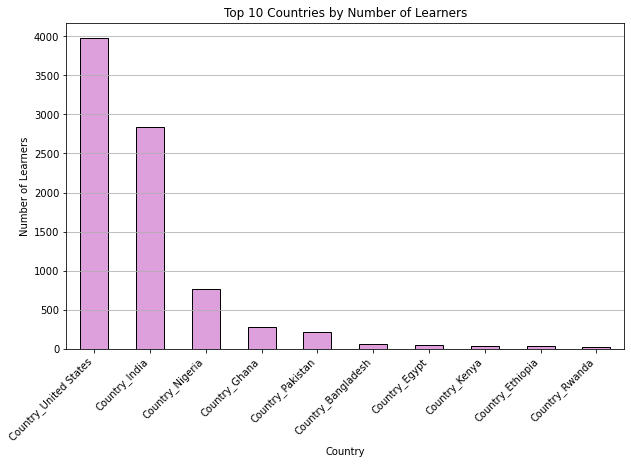

In [117]:
# Step 11: Bar Chart - Top 10 Countries by Number of Learners
import matplotlib.pyplot as plt

# Step 11.1: Select country columns only
country_columns = [col for col in df.columns if col.startswith('Country_')]

# Step 11.2: Sum the number of learners per country
country_counts = df[country_columns].sum().sort_values(ascending=False)

# Step 11.3: Take Top 10 countries
top_countries = country_counts.head(10)

# Step 11.4: Print total learners and total by each country
total_learners = top_countries.sum()
print(f"Total Learners in Top 10 Countries: {total_learners}")
for country, count in top_countries.items():
    print(f"{country}: {count} learners")

# Step 11.5: Plot the bar chart
plt.figure(figsize=(10,6))
top_countries.plot(kind='bar', color='plum', edgecolor='black')
plt.title('Top 10 Countries by Number of Learners')
plt.xlabel('Country')
plt.ylabel('Number of Learners')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

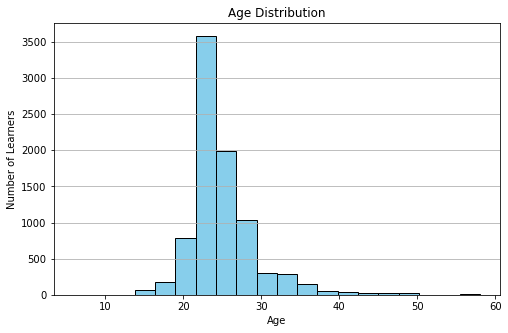

Total data points used for Age Distribution: 8558


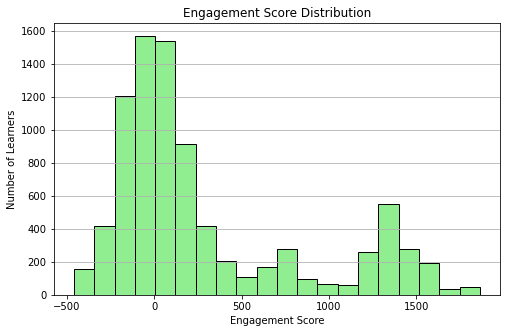

Total data points used for Engagement Score Distribution: 8558


In [118]:
import matplotlib.pyplot as plt

# Step 1: Plot Age Distribution
plt.figure(figsize=(8,5))
plt.hist(df['Age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Learners')
plt.grid(axis='y')
plt.show()

# Print number of data points used
print(f"Total data points used for Age Distribution: {df['Age'].dropna().shape[0]}")

# Step 2: Plot Engagement Score Distribution
plt.figure(figsize=(8,5))
plt.hist(df['Engagement_Score'].dropna(), bins=20, color='lightgreen', edgecolor='black')
plt.title('Engagement Score Distribution')
plt.xlabel('Engagement Score')
plt.ylabel('Number of Learners')
plt.grid(axis='y')
plt.show()

# Print number of data points used
print(f"Total data points used for Engagement Score Distribution: {df['Engagement_Score'].dropna().shape[0]}")





Total Age datapoints: 8558


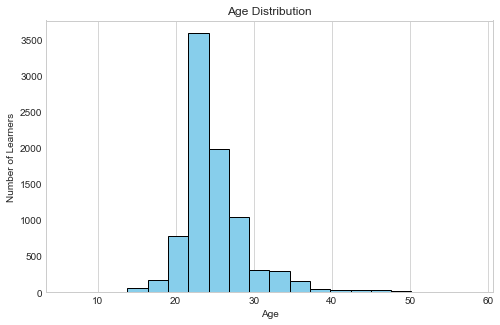

Total Engagement Score datapoints: 8558


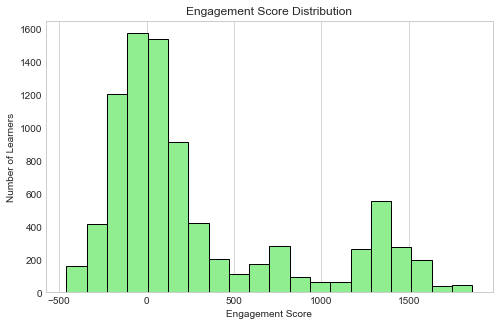

Total Signup Month datapoints: 8558


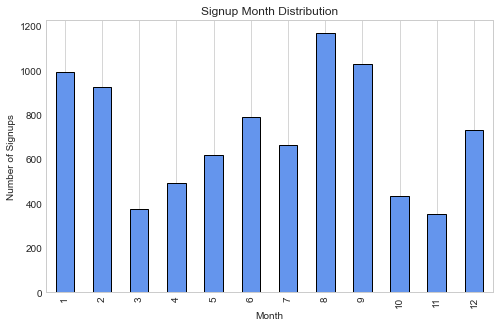

Total Signup Season datapoints: 8558


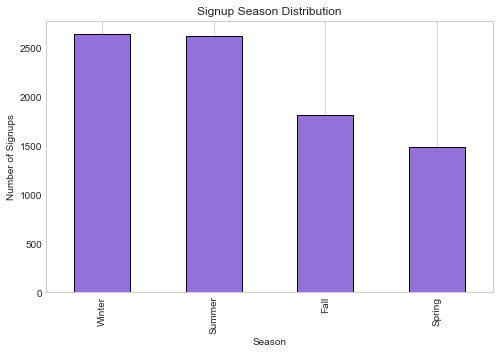

Total Gender datapoints: 8543


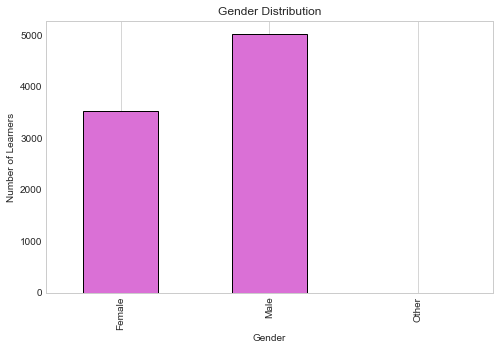

Total Status datapoints: 8558


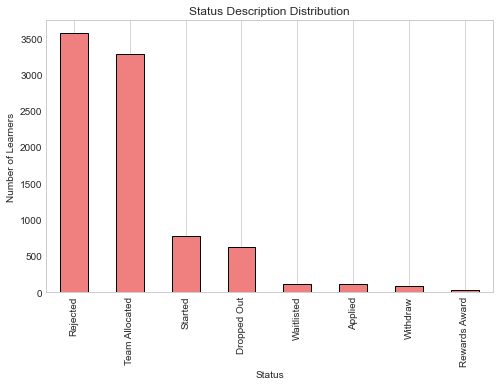

Total Majors datapoints: 8558


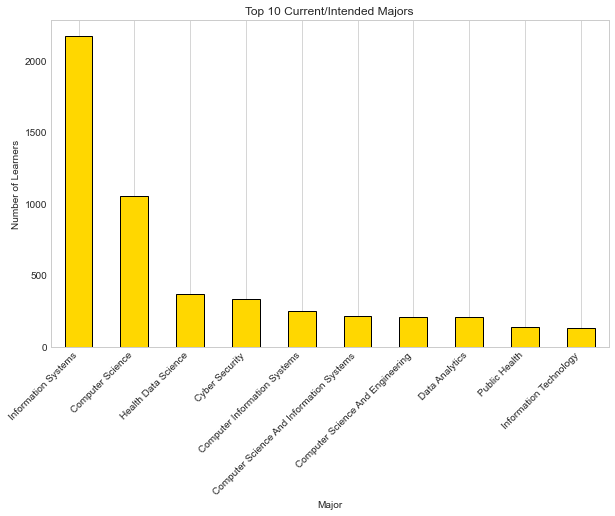

Total Country datapoints: 8557


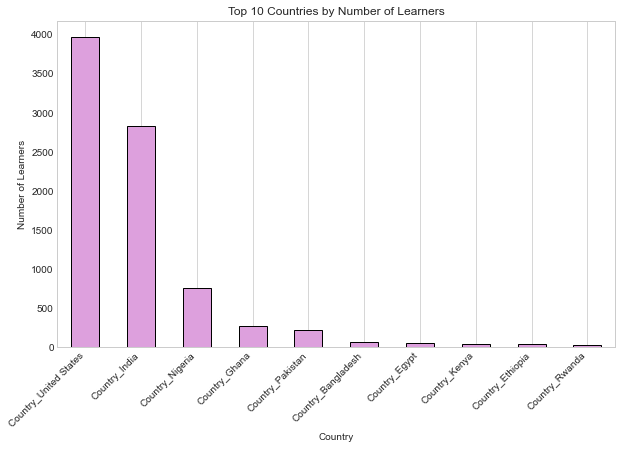

In [121]:
import matplotlib.pyplot as plt

# Set figure style globally
plt.style.use('seaborn-whitegrid')

# 1. Age Distribution (already done, but repeating for flow)
plt.figure(figsize=(8,5))
plt.hist(df['Age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Learners')
plt.grid(axis='y')
print(f"Total Age datapoints: {df['Age'].dropna().shape[0]}")
plt.show()

# 2. Engagement Score Distribution
plt.figure(figsize=(8,5))
plt.hist(df['Engagement_Score'].dropna(), bins=20, color='lightgreen', edgecolor='black')
plt.title('Engagement Score Distribution')
plt.xlabel('Engagement Score')
plt.ylabel('Number of Learners')
plt.grid(axis='y')
print(f"Total Engagement Score datapoints: {df['Engagement_Score'].dropna().shape[0]}")
plt.show()

# 3. Signup Month Distribution
plt.figure(figsize=(8,5))
df['Signup_Month'].dropna().value_counts().sort_index().plot(kind='bar', color='cornflowerblue', edgecolor='black')
plt.title('Signup Month Distribution')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.grid(axis='y')
print(f"Total Signup Month datapoints: {df['Signup_Month'].dropna().shape[0]}")
plt.show()

# 4. Signup Season Distribution
plt.figure(figsize=(8,5))
df['Signup_Season'].dropna().value_counts().plot(kind='bar', color='mediumpurple', edgecolor='black')
plt.title('Signup Season Distribution')
plt.xlabel('Season')
plt.ylabel('Number of Signups')
plt.grid(axis='y')
print(f"Total Signup Season datapoints: {df['Signup_Season'].dropna().shape[0]}")
plt.show()

# 5. Gender Distribution
plt.figure(figsize=(8,5))
gender_cols = ['Gender_Female', 'Gender_Male', 'Gender_Other']
gender_counts = df[gender_cols].sum()
gender_counts.index = ['Female', 'Male', 'Other']  # prettier names
gender_counts.plot(kind='bar', color='orchid', edgecolor='black')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Learners')
plt.grid(axis='y')
print(f"Total Gender datapoints: {gender_counts.sum()}")
plt.show()

# 6. Status Description Distribution
plt.figure(figsize=(8,5))
df['Status Description'].dropna().value_counts().plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Status Description Distribution')
plt.xlabel('Status')
plt.ylabel('Number of Learners')
plt.grid(axis='y')
print(f"Total Status datapoints: {df['Status Description'].dropna().shape[0]}")
plt.show()

# 7. Current/Intended Major Distribution (Top 10 Majors)
plt.figure(figsize=(10,6))
df['Current/Intended Major'].dropna().value_counts().head(10).plot(kind='bar', color='gold', edgecolor='black')
plt.title('Top 10 Current/Intended Majors')
plt.xlabel('Major')
plt.ylabel('Number of Learners')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
print(f"Total Majors datapoints: {df['Current/Intended Major'].dropna().shape[0]}")
plt.show()

# 8. Country Distribution (Top 10)
country_columns = [col for col in df.columns if col.startswith('Country_')]
country_counts = df[country_columns].sum().sort_values(ascending=False)
top_countries = country_counts.head(10)

plt.figure(figsize=(10,6))
top_countries.plot(kind='bar', color='plum', edgecolor='black')
plt.title('Top 10 Countries by Number of Learners')
plt.xlabel('Country')
plt.ylabel('Number of Learners')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
print(f"Total Country datapoints: {country_counts.sum()}")
plt.show()


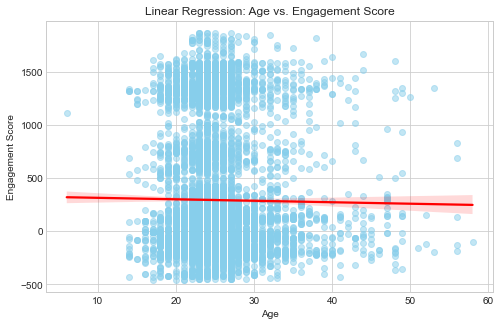

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


R-squared value: 0.0001


In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

# Scatter plot with linear regression line between Age and Engagement Score
plt.figure(figsize=(8,5))
sns.regplot(x='Age', y='Engagement_Score', data=df, scatter_kws={'alpha':0.5, 'color':'skyblue'}, line_kws={'color':'red'})
plt.title('Linear Regression: Age vs. Engagement Score')
plt.xlabel('Age')
plt.ylabel('Engagement Score')
plt.grid(True)
plt.show()

# Calculate R-squared value
X = df['Age']
y = df['Engagement_Score']
X = sm.add_constant(X)  # Adds the intercept to the model

# Fit the model
model = sm.OLS(y, X).fit()

# Print the R-squared value
print(f"R-squared value: {model.rsquared:.4f}")




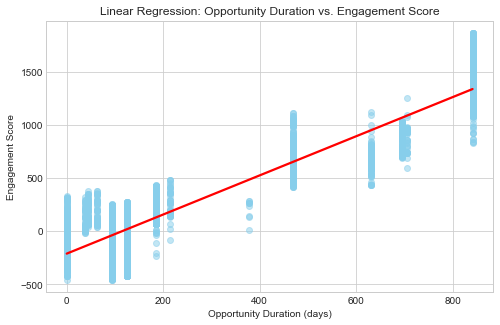

R-squared value for Opportunity Duration vs Engagement Score: 0.9137


In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Linear regression model
model = LinearRegression()

# Scatter plot with linear regression line between Opportunity Duration and Engagement Score
plt.figure(figsize=(8,5))
sns.regplot(x='Opportunity_Duration_days', y='Engagement_Score', data=df, scatter_kws={'alpha':0.5, 'color':'skyblue'}, line_kws={'color':'red'})
plt.title('Linear Regression: Opportunity Duration vs. Engagement Score')
plt.xlabel('Opportunity Duration (days)')
plt.ylabel('Engagement Score')
plt.grid(True)
plt.show()

# Calculate R-squared value for Opportunity Duration vs Engagement Score
X = df['Opportunity_Duration_days'].dropna().values.reshape(-1, 1)
y = df['Engagement_Score'].dropna().values
model.fit(X, y)
r_squared_opportunity = model.score(X, y)

print(f"R-squared value for Opportunity Duration vs Engagement Score: {r_squared_opportunity:.4f}")



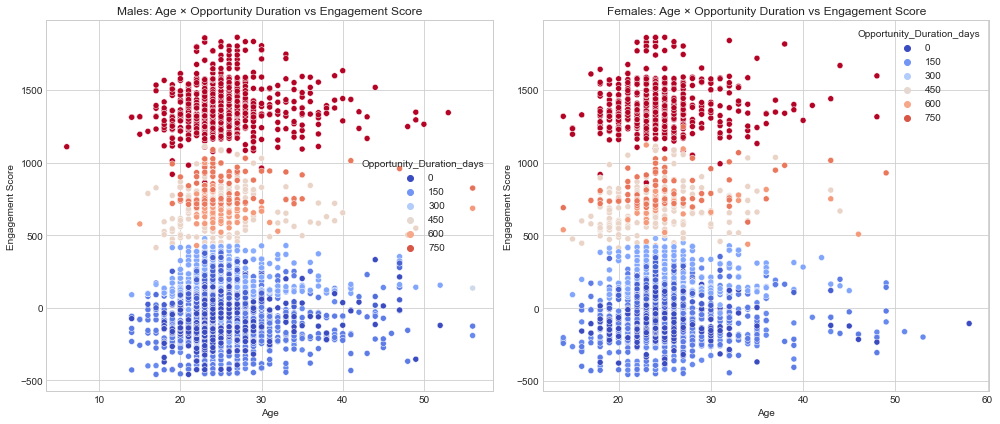

R² for Males (Age × Opportunity Duration vs Engagement Score): 0.9125
R² for Females (Age × Opportunity Duration vs Engagement Score): 0.9146


In [124]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming df is your dataframe
# Focus on relevant columns: Age, Gender, Opportunity Duration, and Engagement Score
df = df[['Age', 'Gender_Female', 'Gender_Male', 'Opportunity_Duration_days', 'Engagement_Score']]

# 1. Separate the data for males and females
df_male = df[df['Gender_Male'] == 1]
df_female = df[df['Gender_Female'] == 1]

# 2. Scatter Plot for Males
plt.figure(figsize=(14, 6))

# Plot for Males
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_male, x='Age', y='Engagement_Score', hue='Opportunity_Duration_days', palette='coolwarm')
plt.title('Males: Age × Opportunity Duration vs Engagement Score')
plt.xlabel('Age')
plt.ylabel('Engagement Score')

# 3. Scatter Plot for Females
# Plot for Females
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_female, x='Age', y='Engagement_Score', hue='Opportunity_Duration_days', palette='coolwarm')
plt.title('Females: Age × Opportunity Duration vs Engagement Score')
plt.xlabel('Age')
plt.ylabel('Engagement Score')

plt.tight_layout()
plt.show()

# 4. Linear Regression Model for Males
X_male = df_male[['Age', 'Opportunity_Duration_days']]
y_male = df_male['Engagement_Score']
model_male = LinearRegression()
model_male.fit(X_male, y_male)
y_pred_male = model_male.predict(X_male)
r2_male = r2_score(y_male, y_pred_male)

# 5. Linear Regression Model for Females
X_female = df_female[['Age', 'Opportunity_Duration_days']]
y_female = df_female['Engagement_Score']
model_female = LinearRegression()
model_female.fit(X_female, y_female)
y_pred_female = model_female.predict(X_female)
r2_female = r2_score(y_female, y_pred_female)

# Print R² values
print(f'R² for Males (Age × Opportunity Duration vs Engagement Score): {r2_male:.4f}')
print(f'R² for Females (Age × Opportunity Duration vs Engagement Score): {r2_female:.4f}')


